In [74]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
dataset = pd.read_csv('C:/Users/Admin/Downloads/diabetes.csv')
dataset.shape

(768, 9)

In [76]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

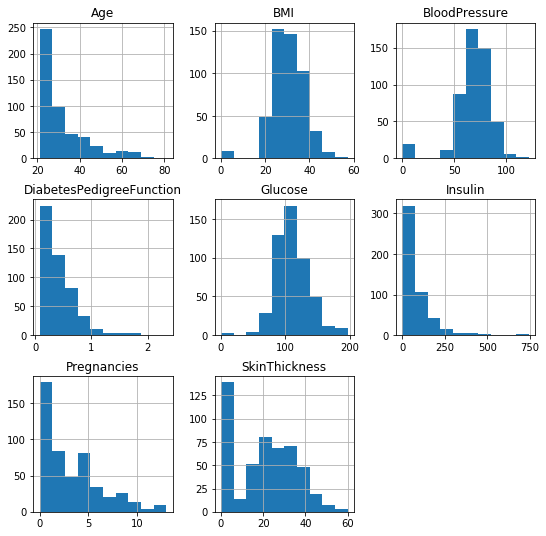

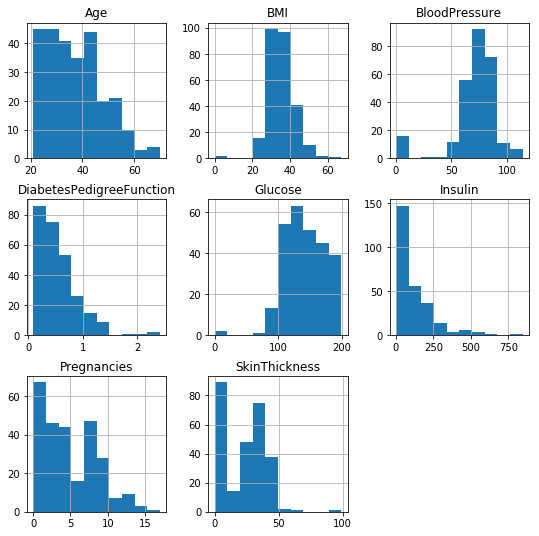

In [78]:
dataset.groupby('Outcome').hist(figsize=(9, 9))

# Populate data in X(independent variable) and y(dependent variable)

In [79]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

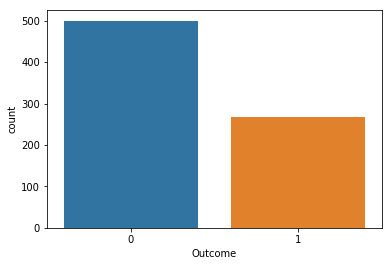

In [80]:
sb.countplot(dataset['Outcome'], label = 'Count')

In [81]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


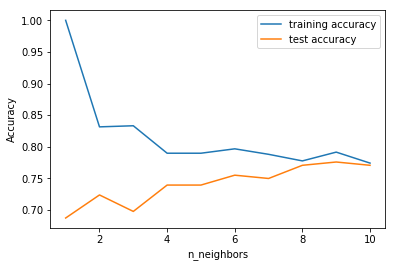

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'Outcome'],dataset['Outcome'], stratify = dataset['Outcome'], random_state = 66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

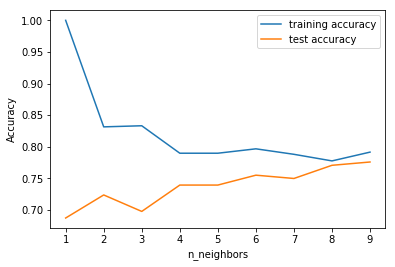

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'Outcome'],dataset['Outcome'], stratify = dataset['Outcome'], random_state = 66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 9
neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier in training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier in testing set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier in training set: 0.79
Accuracy of K-NN classifier in testing set: 0.78


In [85]:
# confusion matrix, roc curve, 

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = knn.predict(X_test)
results = confusion_matrix(y_test,predictions)
print('Confusion matrix')
print(results)
print('Accuracy score:',accuracy_score(y_test,predictions))
print('Report:')
print(classification_report(y_test,predictions))

Confusion matrix
[[110  15]
 [ 29  38]]
Accuracy score: 0.7708333333333334
Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       125
           1       0.72      0.57      0.63        67

   micro avg       0.77      0.77      0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [88]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1],[0,1], color = 'blue', linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Reciever operating characteristic(ROC) curve')
    plt.legend()
    plt.show()

In [89]:
probs = knn.predict_proba(X_test)
probs

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.55555556, 0.44444444],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.77777778, 0.22222222],
       [0.11111111, 0.88888889],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.77777778, 0.22222222],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.

In [90]:
probs = probs[:,1]
probs

array([0.66666667, 0.33333333, 0.11111111, 0.        , 0.        ,
       0.66666667, 0.66666667, 0.44444444, 0.        , 0.33333333,
       1.        , 0.11111111, 0.77777778, 0.        , 0.44444444,
       0.11111111, 0.22222222, 0.88888889, 0.66666667, 0.66666667,
       0.55555556, 0.22222222, 0.44444444, 0.44444444, 0.44444444,
       0.22222222, 0.55555556, 0.44444444, 0.11111111, 0.11111111,
       0.22222222, 0.33333333, 0.44444444, 0.11111111, 0.44444444,
       0.44444444, 0.44444444, 0.55555556, 0.77777778, 0.22222222,
       0.77777778, 0.        , 0.22222222, 0.11111111, 0.88888889,
       0.        , 0.        , 0.66666667, 0.22222222, 0.66666667,
       0.44444444, 1.        , 0.        , 0.33333333, 0.88888889,
       0.44444444, 0.55555556, 0.44444444, 0.        , 0.77777778,
       0.33333333, 0.44444444, 0.11111111, 0.22222222, 0.77777778,
       0.        , 0.22222222, 0.44444444, 0.33333333, 0.33333333,
       0.11111111, 0.22222222, 0.22222222, 0.        , 0.33333

In [91]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.82


In [92]:
fpr, tpr, thresholds = roc_curve(y_test,probs)

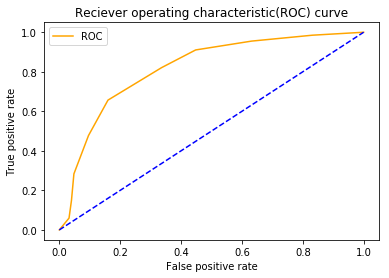

In [93]:
plot_roc_curve(fpr,tpr)